## Proyecto Análisis de Datos 

##### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc

Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

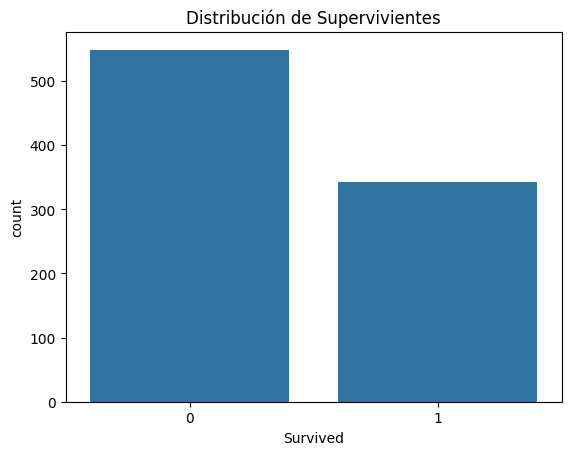

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV

# Cargar el dataset
file_path = "Titanic-Dataset.csv"  # Cambiar según sea necesario
data = pd.read_csv(file_path)

# 1. Análisis Exploratorio de los Datos
print("Primeras filas del dataset:")
print(data.head())

print("\nInformación del dataset:")
print(data.info())

print("\nEstadísticas descriptivas:")
print(data.describe())

# Relación entre variables
sns.countplot(x='Survived', data=data)
plt.title('Distribución de Supervivientes')
plt.show()



### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [3]:
# Tratamiento de valores faltantes
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Eliminación de columnas irrelevantes
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Codificación de variables categóricas
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Verificación de columnas no numéricas
print("Tipos de datos después del preprocesamiento:")
print(data.dtypes)

# Normalización de los datos (solo columnas numéricas)
X = data.drop('Survived', axis=1)
y = data['Survived']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Confirmación de datos procesados correctamente
print("Datos normalizados correctamente.")

Tipos de datos después del preprocesamiento:
Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object
Datos normalizados correctamente.


C:\Users\DIRECTOR FACTURACION\AppData\Local\Temp\ipykernel_9352\3822745325.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\DIRECTOR FACTURACION\AppData\Local\Temp\ipykernel_9352\3822745325.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de caracteristicas.

In [4]:
# 3. Selección de características
X = data.drop('Survived', axis=1)  # Variables predictoras
y = data['Survived']               # Variable objetivo

# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Selección de las mejores características
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X_scaled, y)

print("\nPuntajes de importancia de las características:")
print(pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_}).sort_values(by='Score', ascending=False))



Puntajes de importancia de las características:
      Feature       Score
5    Sex_male  372.405724
0      Pclass  115.031272
4        Fare   63.030764
7  Embarked_S   20.374460
3       Parch    5.963464
1         Age    3.761528
2       SibSp    1.110572
6  Embarked_Q    0.011846


### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [5]:
# 4. División en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


### 5. Entrenar el modelo configurando los diferentes hiperparametros

In [14]:
# Configuración de los hiperparámetros para la regresión logística
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],       # Tipos de regularización
    'C': [0.01, 0.1, 1, 10],                    # Inverso de la fuerza de regularización
    'solver': ['saga'],                         # Solvers compatibles con todas las regularizaciones
    'max_iter': [100, 200],                     # Iteraciones máximas
    'l1_ratio': [0.1, 0.5, 0.9]                 # Solo relevante para elasticnet
}

# Filtrar combinaciones no válidas
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    error_score='raise'  # Detenerse en caso de error para depurar más fácilmente
)

# Entrenamiento del modelo
grid_search.fit(X_train, y_train)

print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)




Mejores hiperparámetros encontrados:
{'C': 0.01, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


c:\Users\DIRECTOR FACTURACION\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Matriz de Confusión:


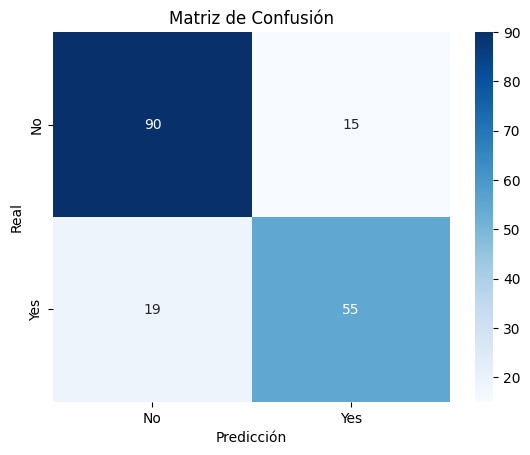

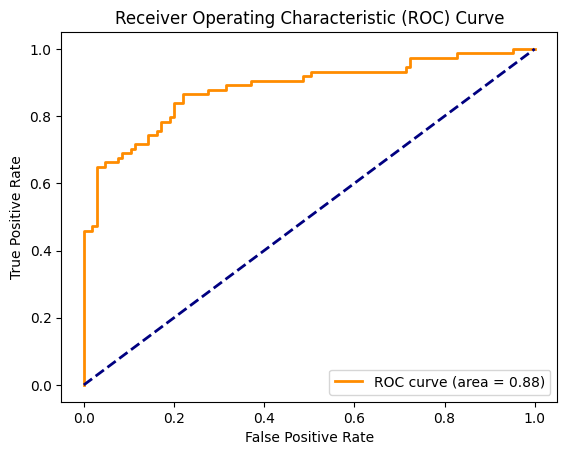

In [15]:
# 6. Evaluación del modelo
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

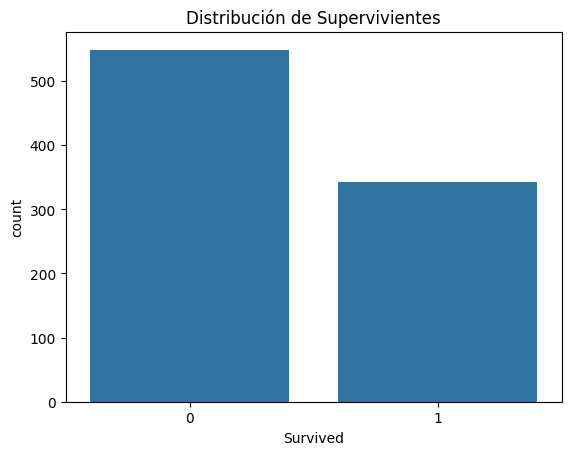

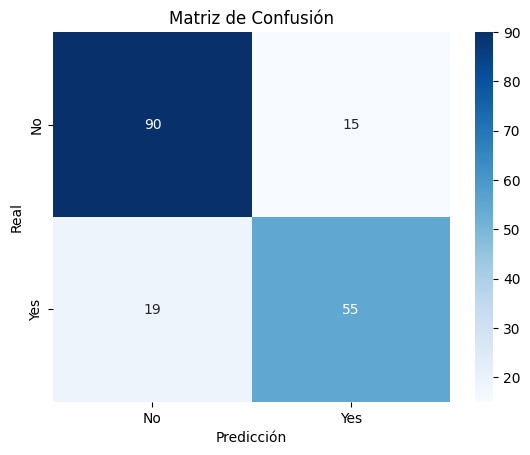

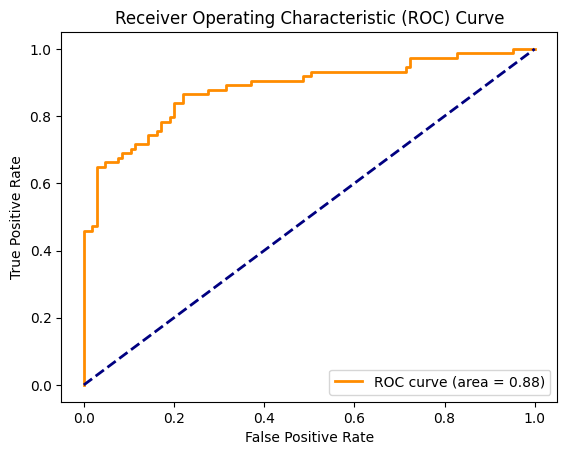

C:\Users\DIRECTOR FACTURACION\AppData\Local\Temp\ipykernel_9352\76428969.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


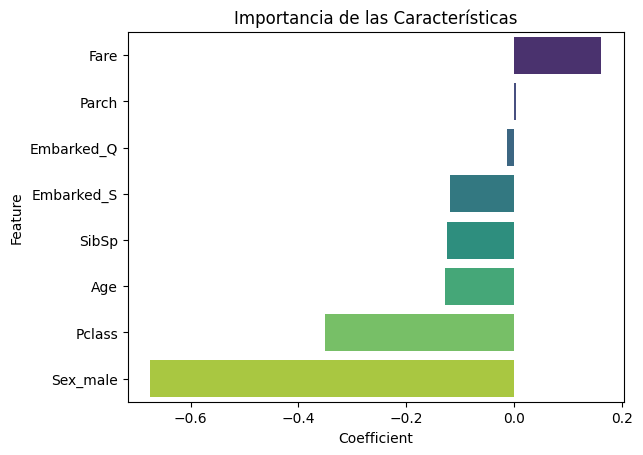

In [17]:
# Gráficas del análisis exploratorio
# Distribución de Supervivientes
sns.countplot(x='Survived', data=data)
plt.title('Distribución de Supervivientes')
plt.show()

# Gráficas de evaluación del modelo
# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Importancia de las Características
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': best_model.coef_[0]}).sort_values(by='Coefficient', ascending=False)
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Importancia de las Características')
plt.show()
